   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1  Female   45              145000                      19
1           2    Male   55               70000                      75
2           3  Female   60              105000                      90
3           4    Male   62               45000                      69
4           5    Male   33               30000                      56


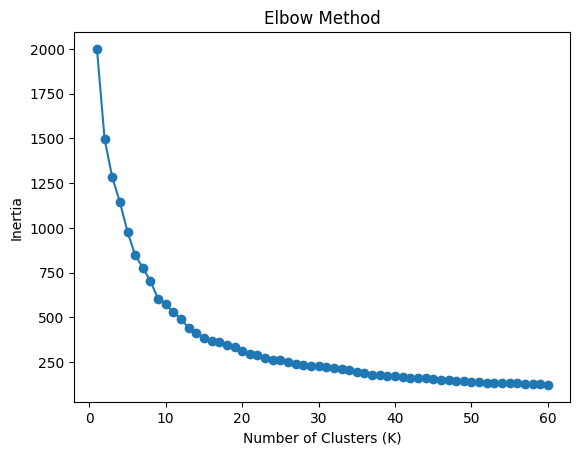

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   45              145000                      19   
1             2       0   55               70000                      75   
2             3       1   60              105000                      90   
3             4       0   62               45000                      69   
4             5       0   33               30000                      56   
..          ...     ...  ...                 ...                     ...   
495         496       1   34               40000                       6   
496         497       0   39               90000                      65   
497         498       0   55              135000                      94   
498         499       1   35               20000                       2   
499         500       1   65               15000                      92   

     Cluster  
0         15  
1          2  
2         18  
3          2  
4          6

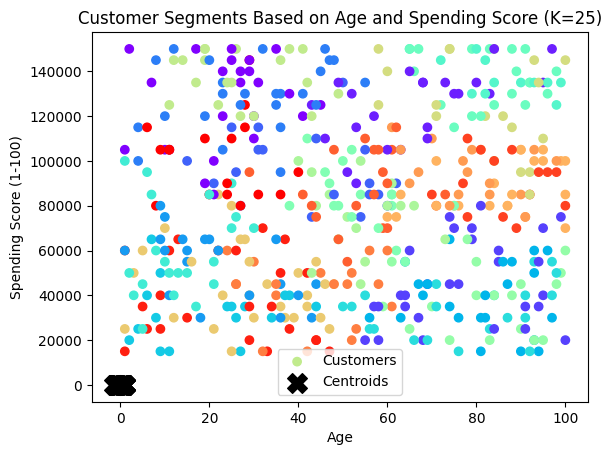

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset from a CSV file
data = pd.read_csv('/content/Customers.csv')  # Replace 'your_dataset.csv' with your actual CSV file path

# Inspect the first few rows of the data to understand its structure
print(data.head())

# If 'Gender' is a column, encode it as a numeric value (Male=0, Female=1)
# Modify this line if the column names are different or if you need different encoding
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Select the relevant features for clustering (ensure these are the columns you need)
# Modify the column names if necessary (e.g., 'Age', 'Income', 'Spending Score')
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Elbow Method to find the optimal number of clusters (K)
inertia = []
for k in range(1, 61):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 61), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 25  # Adjust this based on the Elbow Method graph
# Based on the Elbow method, choose the optimal number of clusters (say K=3)
kmeans = KMeans(n_clusters=25, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster assignments to the data
data['Cluster'] = clusters

# Show the resulting clusters
print(data)

# Save the clustered data to a new CSV file
data.to_csv('clustered_customers.csv', index=False)

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_

# Visualize the clusters (2D plot of the first two features for simplicity)
plt.scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'], c=data['Cluster'], cmap='rainbow', label='Customers')
plt.scatter(centroids[:, 1], centroids[:, 3], c='black', marker='X', s=200, label='Centroids')  # Plot centroids

# Add titles and labels
plt.title(f'Customer Segments Based on Age and Spending Score (K={optimal_k})')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Add legend
plt.legend()

# Show the plot
plt.show()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1  Female   45              145000                      19
1           2    Male   55               70000                      75
2           3  Female   60              105000                      90
3           4    Male   62               45000                      69
4           5    Male   33               30000                      56
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   45              145000                      19   
1           2       0   55               70000                      75   
2           3       1   60              105000                      90   
3           4       0   62               45000                      69   
4           5       0   33               30000                      56   

   Cluster  
0        1  
1        2  
2        1  
3        2  
4        0  
   CustomerID  Gender  Age  Annual Income (k$)  Spe

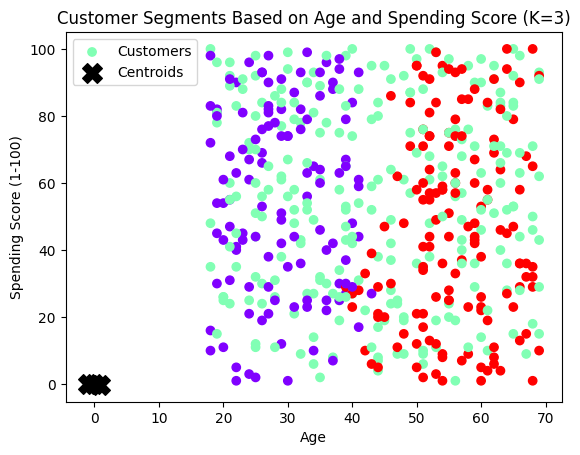

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load your dataset from a CSV file
data = pd.read_csv('/content/Customers.csv')  # Replace with your actual CSV file path

# Inspect the first few rows of the data to understand its structure
print(data.head())

# If 'Gender' is a column, encode it as a numeric value (Male=0, Female=1)
# Modify this line if the column names are different or if you need different encoding
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Select the relevant features for clustering (ensure these are the columns you need)
# Modify the column names if necessary (e.g., 'Age', 'Income', 'Spending Score')
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Perform K-Means clustering to get cluster labels
optimal_k = 3 # After visual inspection of the elbow plot, we select the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Show the resulting clusters
print(data.head())

# Now, let's use KNN to predict the cluster labels
# We use the scaled data and the 'Cluster' as the target label
X = scaled_data
y = data['Cluster']

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune the 'n_neighbors' parameter
knn.fit(X, y)  # Train the KNN model using the features and their respective cluster labels

# Predict the clusters for the data (you could use new data points as well)
predicted_clusters = knn.predict(X)

# Add the predicted cluster labels to the data
data['Predicted_Cluster'] = predicted_clusters

# Show the results
print(data.head())

# Save the results with predicted cluster labels to a new CSV file
data.to_csv('clustered_with_knn.csv', index=False)

# Visualize the clusters and the centroids using the KMeans result
centroids = kmeans.cluster_centers_

# 2D plot of Age vs Spending Score with KNN predicted clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Predicted_Cluster'], cmap='rainbow', label='Customers')
plt.scatter(centroids[:, 1], centroids[:, 3], c='black', marker='X', s=200, label='Centroids')  # Plot centroids

# Add titles and labels
plt.title(f'Customer Segments Based on Age and Spending Score (K={optimal_k})')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset from a CSV file
file_path = '/content/exams.csv'
data = pd.read_csv(file_path)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
data['gender'] = data['gender'].map({'male': 0, 'female': 1})
#data['test preparation course'] = data['test preparation course'].map({'none': 0, 'completed': 1})
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group A,high school,standard,completed,67,67,63
1,1,group D,some high school,free/reduced,none,40,59,55
2,0,group E,some college,free/reduced,none,59,60,50
3,0,group B,high school,standard,none,77,78,68
4,0,group E,associate's degree,standard,completed,78,73,68


In [ ]:
features = data[['gender', 'math score', 'reading score', 'writing score']]
features.head()

,gender,math score,reading score,writing score
0,0,67,67,63
1,1,40,59,55
2,0,59,60,50
3,0,77,78,68
4,0,78,73,68


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data

array([[-0.96655883,  0.03923309, -0.13591401, -0.30385073],
       [ 1.03459817, -1.714564  , -0.67902695, -0.81689543],
       [-0.96655883, -0.48041049, -0.61113783, -1.13754838],
       ...,
       [ 1.03459817, -2.23420758, -2.30836575, -1.71472367],
       [ 1.03459817,  0.42896578,  0.33930981,  0.91463045],
       [-0.96655883, -0.0906778 , -0.61113783, -0.36798132]])

In [ ]:
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

In [ ]:
inertia

[3999.999999999998,
 2211.9619810266922,
 1593.1899045815676,
 1109.5188508186422,
 879.9805234322763,
 619.1437456332928,
 527.6647560002427,
 478.47126873638206,
 386.3786398922986,
 343.50090471061327,
 320.7996176023308,
 305.2784965592585,
 275.67068120373125,
 265.8231990903846,
 253.78847584940928,
 238.3513727354528,
 229.04227595044583,
 220.69662667663437,
 215.4425703438199,
 198.64481949316078]

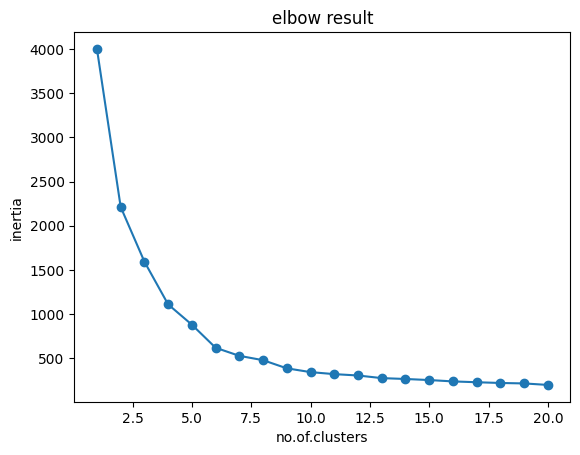

In [ ]:
plt.plot(range(1,21), inertia, marker='o')
plt.title('elbow result')
plt.xlabel('no.of.clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
optimal_k = 7
kmeans = KMeans(n_clusters= optimal_k, random_state=32)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
data['K']=clusters
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,K
0,0,group A,high school,standard,completed,67,67,63,5
1,1,group D,some high school,free/reduced,none,40,59,55,3
2,0,group E,some college,free/reduced,none,59,60,50,5
3,0,group B,high school,standard,none,77,78,68,2
4,0,group E,associate's degree,standard,completed,78,73,68,2


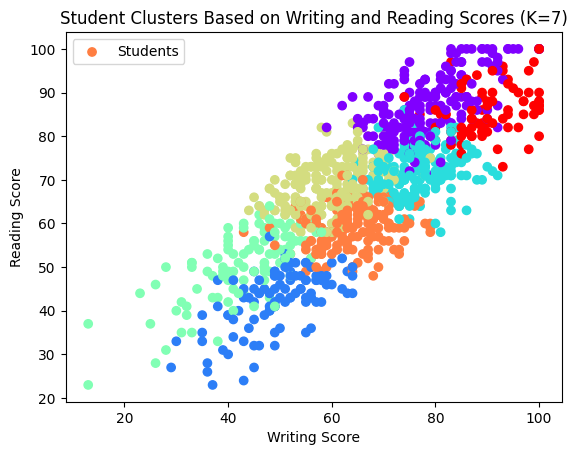

In [ ]:
centroids=kmeans.cluster_centers_

plt.scatter(data['math score'], data['writing score'], c=data['K'], cmap='rainbow', label='Students')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title(f'Student Clusters Based on Writing and Reading Scores (K={optimal_k})')
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()